# Import lib

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# The latest CDF library https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/latest/
from spacepy import pycdf

# os.environ["CDF_LIB"] = "C:\\Program Files\\CDF_Distribution\\cdf39_0-dist\\lib"
os.environ["CDF_LIB"] = "/Applications/cdf/cdf39_0-dist/lib"

# sys.path.append('../lib/')
sys.path.append('./lib/')

import juice_cdf_lib as juice_cdf

# Setting and Read CDF file

In [3]:
# *** Parameter set ***
spec_mode = 0                           # 0: low-resoltion   1: high-resolution
cal_mode = 1                            # 0: raw    1: dBm   2: V    3:V2    4: V2/Hz
cal = 0                                 # 0: background   1: cal

# E_power_min = 1e-4                      # E_power_min: 10e-4 (--> -144 dBm)
f_max = 45000                           # f_max [kHz]
f_min = 80                              # f_min [kHz]
p_max = 8.5                             # background: 8   CAL: 10
p_min = 1.5                             # background: 2   CAL: 5

cf = 0.0                                # Conversion Factor: RAW
if cal_mode == 1:
    cf = -104.1                         # dBm @ ADC input
elif cal_mode == 2:
    cf = -104.1 - 13.01                 # V^2 @ ADC input
"""
* Conversion Factor
    0 dB @ RAW   ==>  -104.1 dBm    @ ADC input
                 ==>  -114.1 dB V  = 1.97E-6 V
                 ==>  -117.1 dB v2 = 1.40E-6 Vrms
                 
    (ref)   +-1 V (2Vpp, 0dB V) -->  1(V) * 1(V) / 50(ohm) / 2 * 1000 (mW) = 10 mW (+10 dBm)
            = 0.707 Vrms (-3.01 dB Vrms)
            ==> 0dB V  =  -3.01 dB Vrms  =  +10 dBm
            
* SG @ EM2-0       5.50 MHz, 0.01 Vpp   X-ch:90deg, Y-ch:0deg, Z-ch:0deg        impedance: 50Ω 
    +-13000  ==>    3.85E
                    +-0.01240 V -->   0.024 Vpp ??]
    [+-13000  ==> +-0.01240 V -->   0.024 Vpp ??]

* ADC input
    20-bit res  (1048576 [120.4 dB))   max 1.0 Vpp
                 ==>  1-bit:  9.54e-7 V [-120.4 dB V]

"""

p_max = p_max + cf/10
p_min = p_min + cf/10
if spec_mode == 1:
    p_max = p_max - 1.5
    p_min = p_min - 1.5

# *** Folder set ***
work_dir = '/Users/user/0-python/JUICE_notebook/ql/'   # Plot dump folder
data_dir = '/Users/user/0-python/JUICE_GS_test/cdf/org/'   # Data folder

In [4]:
# *** NECP ***
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230419T135849-20230419T141229_V01___RPR1_52000000_2023.109.16.17.21.607.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230419T141231-20230419T141402_V01___RPR1_52000001_2023.109.17.51.54.600.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230530T100326-20230530T100925_V01___RPR1_52000010_2023.150.10.40.53.663.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230530T100927-20230530T100937_V01___RPR1_52000011_2023.150.10.41.53.508.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230530T100326-20230530T100925_V01___RPR1_52000010_2023.150.10.40.53.663.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T120759-20230601T120857_V01___RPR1_52000015_2023.152.12.32.12.471.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T121435-20230601T121533_V01___RPR1_52000016_2023.152.13.14.38.473.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T122138-20230601T122236_V01___RPR1_52000017_2023.152.13.55.02.539.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T122707-20230601T122805_V01___RPR1_52000018_2023.152.14.35.37.467.cdf'
data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T123416-20230601T123514_V01___RPR1_52000019_2023.152.15.15.55.483.cdf'

# *** High-samp rate ***
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000304-20000101T000308_V01___TMIDX_00000_32.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000150-20000101T000154_V01___TMIDX_00000_64.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000355-20000101T000359_V01___TMIDX_00000_96.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000555-20000101T000559_V01___TMIDX_00000_128.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000725-20000101T000730_V01___TMIDX_00000_256.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000131-20000101T000139_V01___TMIDX_00000_512.bin.cdf'

# *** High-samp rate: Tsuchiya ***
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000050-20000101T000454_V01___HF_SID2_032_20230624-1132.ccs.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000031-20000101T000940_V01___HF_SID2_064_20230624-1139.ccs.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000111-20000101T000150_V01___HF_SID2_128_20230624-1306.ccs.cdf'

# *** Ver.2 ***
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000459-20000101T000700_V01___HF_20210920-1007.ccs.cdf'

cdf_file = data_dir + data_name
# %ls $data_dir
%ls $cdf_file

/Users/user/0-python/JUICE_GS_test/cdf/org/JUICE_L1a_RPWI-HF-SID2_20230601T123416-20230601T123514_V01___RPR1_52000019_2023.152.15.15.55.483.cdf


# get SID-2 data

In [5]:
cdf = pycdf.CDF(cdf_file)
data = juice_cdf.juice_getdata_hf_sid02(cdf)

# Raw data

2023/06/01


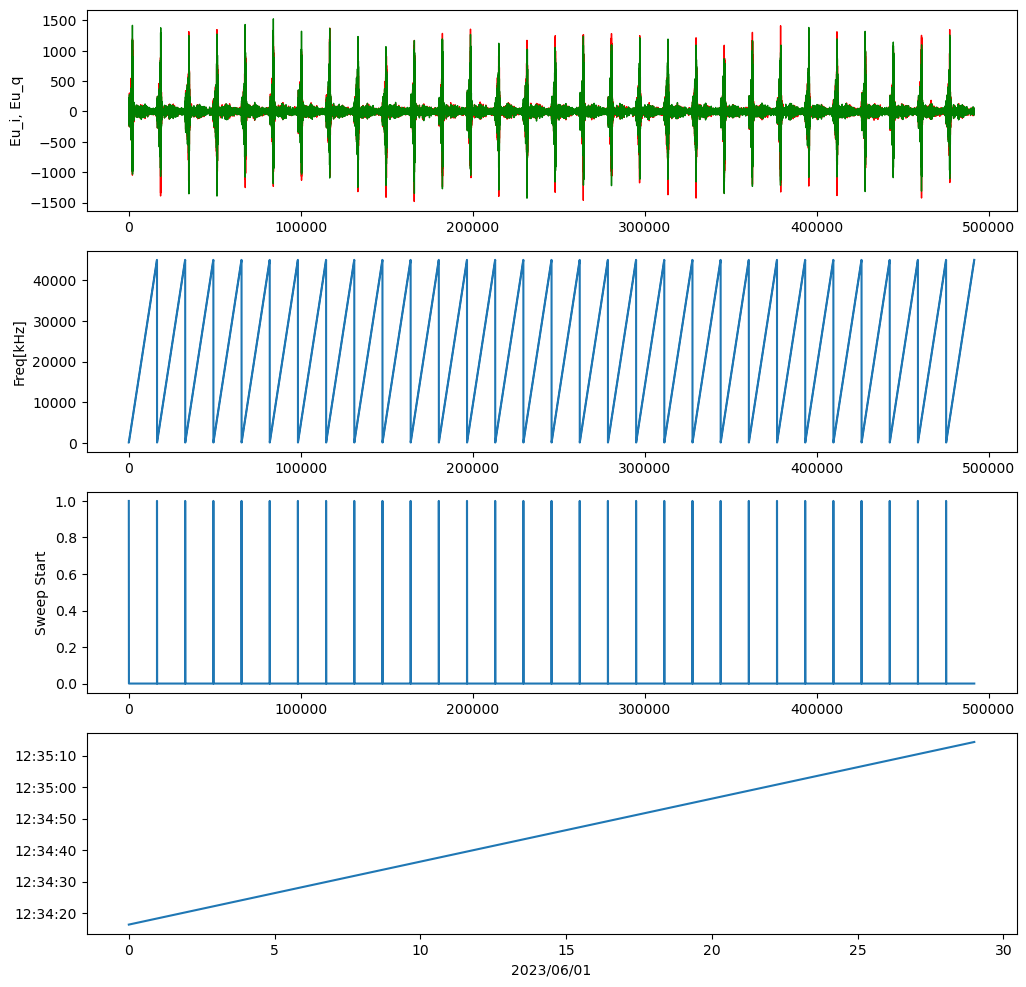

In [6]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)

ax1.plot(np.ravel(data.Eu_i), '-r', linewidth=1)
ax1.plot(np.ravel(data.Eu_q), '-g', linewidth=1)
ax2.plot(np.ravel(data.frequency))
ax3.plot(np.ravel(data.sweep_start))
ax4.plot(np.ravel(data.epoch))
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
print(date)

ax1.set_ylabel('Eu_i, Eu_q')
ax2.set_ylabel('Freq[kHz]')
ax3.set_ylabel('Sweep Start')
ax4.set_xlabel(date)

# xlim=[458239, 458241]
# ax1.set_xlim(xlim)
# ax2.set_xlim(xlim)
# ax3.set_xlim(xlim)
# ylim=[-13000, -12000]
# ax1.set_ylim(ylim)
# ax2.set_ylim(ylim)
# ax3.set_ylim(ylim)
plt.show()
png_fname = work_dir+data_name+'_raw.png'
fig.savefig(png_fname)


In [7]:
# Sped mode:  0 - low resolution,  1 - high resolution  
spec = juice_cdf.juice_getspec_hf_sid02(data, spec_mode)

spec.Eu_power = spec.Eu_power * 10**(cf/10)
spec.Ev_power = spec.Ev_power * 10**(cf/10)
spec.Ew_power = spec.Ew_power * 10**(cf/10)

n_time = spec.Eu_power.shape[1]
n_freq = spec.Eu_power.shape[0]
# print(spec.Eu_power.shape, n_time, n_freq)

15360 15360 15360 15360 30 512
[35388.42298971  9960.65678733 12133.53130206 ...   365.70233433
   446.28782241   420.16390575]
[[3.24854591e+02 1.60163483e+03 5.28775003e+01 ... 8.87392579e+02
  8.95187656e+02 9.63306398e+02]
 [7.37177184e+02 4.09821958e+02 9.82837328e+02 ... 3.64774287e+03
  1.04902795e+03 5.23493010e+01]
 [7.12950769e+04 1.30674590e+03 2.25882388e+03 ... 4.75483206e+02
  1.59922880e+03 1.78537895e+02]
 ...
 [7.15911912e+00 2.13911579e+01 1.56646294e+00 ... 1.36758829e+01
  4.43582558e+01 4.43038940e+00]
 [7.72610312e+00 2.05131294e+01 5.87943243e+00 ... 2.73308155e+01
  2.08156350e+02 4.97588423e+01]
 [8.28953620e-01 1.23355645e+01 4.24164002e+01 ... 4.11229789e+01
  1.52055506e+01 2.65294838e+01]]


ValueError: cannot reshape array of size 184320 into shape (30,512)

# Spectra

# LOG: Frequency - Power

In [ ]:
fig = plt.figure(figsize=(12, 6))

for i in range(spec.n_step):
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Eu_power[i*spec.n_samp:(i+1)*spec.n_samp,0], '-r', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ev_power[i*spec.n_samp:(i+1)*spec.n_samp,0], '-g', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ew_power[i*spec.n_samp:(i+1)*spec.n_samp,0], '-b', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Eu_power[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':r', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Ev_power[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':g', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Ew_power[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':b', linewidth=1)
    
plt.xlabel('Frequency [kHz]')
plt.xscale('log')
plt.xlim(f_min, f_max)

plt.yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
plt.ylim(10**p_min, 10**p_max)

plt.show()
png_fname = work_dir+data_name+'_spec-log.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_spec-log_h.png'
fig.savefig(png_fname)

# Linear: Frequency - Power diagram

In [ ]:
fig = plt.figure(figsize=(12, 6))

for i in range(spec.n_step):
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Eu_power[i*spec.n_samp:(i+1)*spec.n_samp,0], '-r', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ev_power[i*spec.n_samp:(i+1)*spec.n_samp,0], '-g', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ew_power[i*spec.n_samp:(i+1)*spec.n_samp,0], '-b', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Eu_power[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':r', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Ev_power[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':g', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Ew_power[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':b', linewidth=1)

plt.xlabel('Frequency [kHz]')
plt.xlim(f_min, f_max)

plt.yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
plt.ylim(10**p_min, 10**p_max)

plt.show()
png_fname = work_dir+data_name+'_spec.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_spec_h.png'
fig.savefig(png_fname)

# LOG: Frequency - Time diagram

In [ ]:
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# Y-axis
ax1.set_ylim(f_min, f_max)
ax2.set_ylim(f_min, f_max)
ax3.set_ylim(f_min, f_max)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(spec.epoch, spec.frequency, spec.Eu_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p2 = ax2.pcolormesh(spec.epoch, spec.frequency, spec.Ev_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p3 = ax3.pcolormesh(spec.epoch, spec.frequency, spec.Ew_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V^2@ADC]'
pp1 = fig.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(str)
pp2 = fig.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(str)
pp3 = fig.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(str)

png_fname = work_dir+data_name+'_FT-log.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_FT-log_h.png'
# fig.savefig(png_fname)


# Linear: Frequency - Time diagram

In [ ]:
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# Y-axis
ax1.set_ylim(f_min, f_max)
ax2.set_ylim(f_min, f_max)
ax3.set_ylim(f_min, f_max)
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(spec.epoch, spec.frequency, spec.Eu_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p2 = ax2.pcolormesh(spec.epoch, spec.frequency, spec.Ev_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p3 = ax3.pcolormesh(spec.epoch, spec.frequency, spec.Ew_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V^2@ADC]'
pp1 = fig.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(str)
pp2 = fig.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(str)
pp3 = fig.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(str)

png_fname = work_dir+data_name+'_FT-log.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_FT-log_h.png'
# fig.savefig(png_fname)

# Analyses

In [ ]:
fig = plt.figure(figsize=(12, 6))

# plt.plot(spec.frequency[0:spec.n_step*spec.n_samp,0], spec.Eu_power[0:spec.n_step*spec.n_samp,0], '-r', linewidth=1)
n_samp = np.int16(spec.n_samp * 0.75)

for i in range(spec.n_step):
    if i>0:
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,0], spec.Eu_power[i*n_samp:(i+1)*n_samp,0], '-r', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,0], spec.Ev_power[i*n_samp:(i+1)*n_samp,0], '-g', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,0], spec.Ew_power[i*n_samp:(i+1)*n_samp,0], '-b', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,n_time-1], spec.Eu_power[i*n_samp:(i+1)*n_samp,n_time-1], ':r', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,n_time-1], spec.Ev_power[i*n_samp:(i+1)*n_samp,n_time-1], ':g', linewidth=1)
        plt.plot(spec.frequency[i*n_samp:(i+1)*n_samp,n_time-1], spec.Ew_power[i*n_samp:(i+1)*n_samp,n_time-1], ':b', linewidth=1)

plt.xlabel('Frequency [kHz]')
# plt.xlim(f_min, f_max)
# plt.xlim(0, 1000)
plt.xlim(180, 420)

plt.yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
# plt.ylim(10**p_min, 10**p_max)

plt.show()
png_fname = work_dir+data_name+'_spec.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_spec_h.png'
fig.savefig(png_fname)

In [ ]:
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# Y-axis
# ax1.set_ylim(f_min, f_max)
# ax2.set_ylim(f_min, f_max)
# ax3.set_ylim(f_min, f_max)
ax1.set_ylim(0, 1000)
ax2.set_ylim(0, 1000)
ax3.set_ylim(0, 1000)
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(spec.epoch, spec.frequency, spec.Eu_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p2 = ax2.pcolormesh(spec.epoch, spec.frequency, spec.Ev_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p3 = ax3.pcolormesh(spec.epoch, spec.frequency, spec.Ew_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V^2@ADC]'
pp1 = fig.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(str)
pp2 = fig.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(str)
pp3 = fig.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(str)

png_fname = work_dir+data_name+'_FT-log.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_FT-log_h.png'
# fig.savefig(png_fname)

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)

ax1.plot(np.ravel(data.Eu_i), '-r', linewidth=1)
ax1.plot(np.ravel(data.Eu_q), '-g', linewidth=1)
ax2.plot(np.ravel(data.frequency))
ax3.plot(np.ravel(data.sweep_start))
ax4.plot(np.ravel(data.epoch))
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
print(date)

ax1.set_ylabel('Eu_i, Eu_q')
ax2.set_ylabel('Freq[kHz]')
ax3.set_ylabel('Sweep Start')
ax4.set_xlabel(date)

xlim=[1952, 2048]
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)
ax3.set_xlim(xlim)
plt.show()
png_fname = work_dir+data_name+'_raw.png'
fig.savefig(png_fname)
